# 1. Análisis Exploratorio de Datos (EDA)
En este notebook realizaremos un análisis exploratorio inicial de los datos del challenge de clasificación biomédica.

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Configurar visualización
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\User\AppData\Local\Temp\ipykernel_2028\3770973048.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
# Cargar datos
df = pd.read_csv('../data/raw/challenge_data-18-ago.csv', sep=None, engine="python", quotechar='"')
print("Dimensiones del dataset:", df.shape)
df.head()

## 1. Análisis de Clases Analizaremos la distribución de las categorías médicas en nuestro dataset.

Dimensiones del dataset: (3565, 3)


,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological


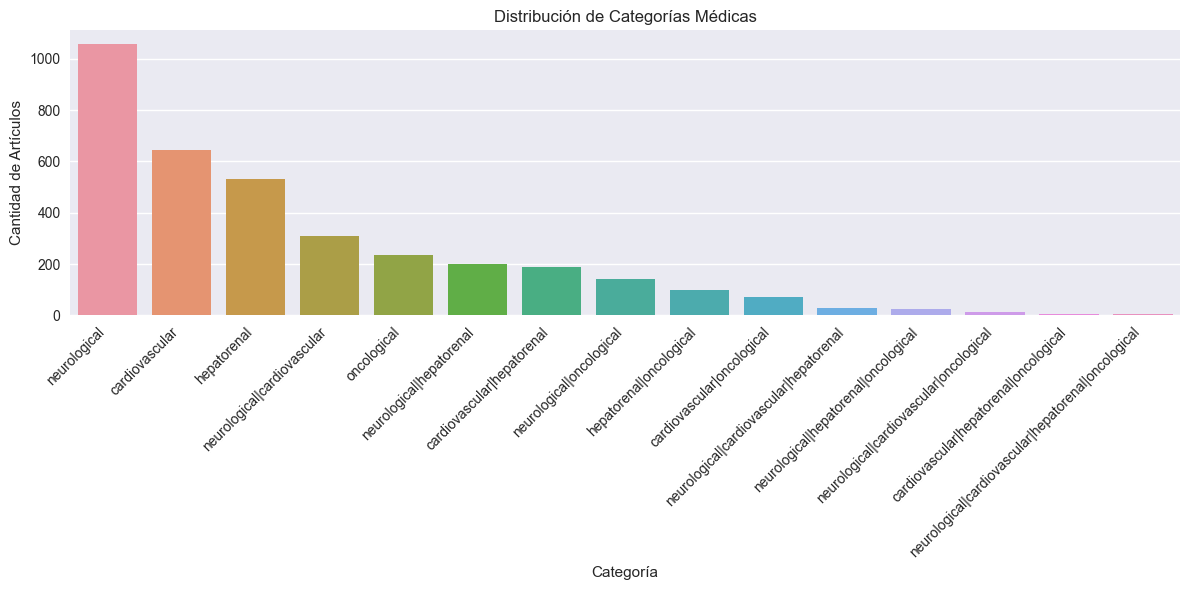


Estadísticas de clases:
count      15.000000
mean      237.666667
std       297.226865
min         7.000000
25%        27.000000
50%       143.000000
75%       272.500000
max      1058.000000
Name: group, dtype: float64


In [5]:
# Distribución de clases
plt.figure(figsize=(12, 6))
class_dist = df['group'].value_counts()
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Categorías Médicas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Artículos')
plt.tight_layout()
plt.show()

print("\nEstadísticas de clases:")
print(class_dist.describe())

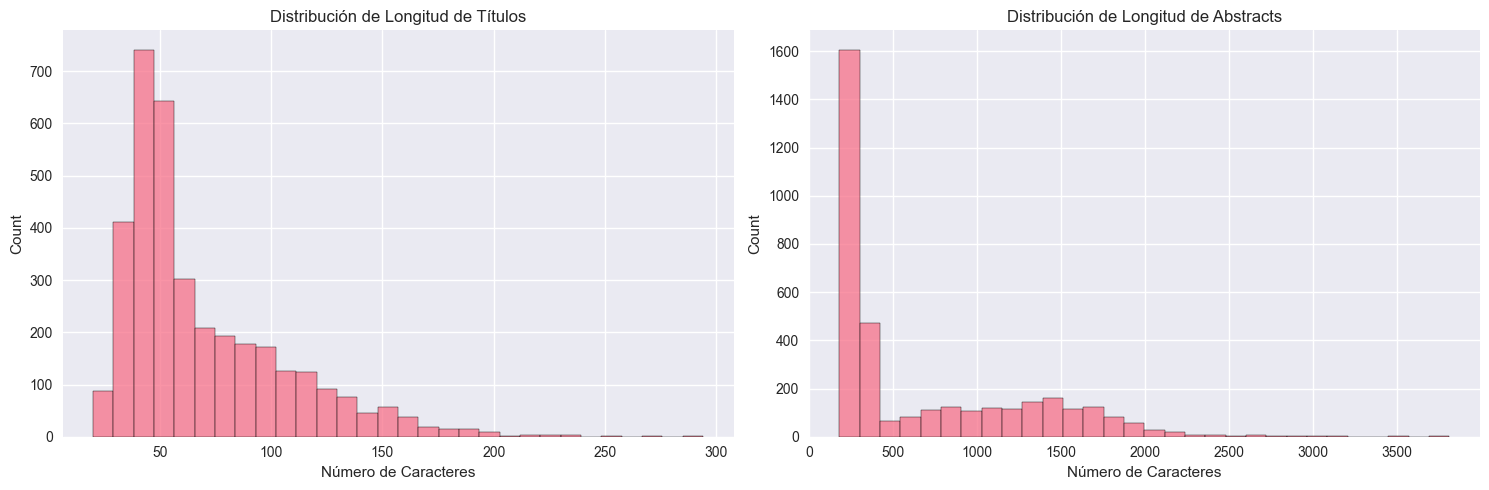


Estadísticas de longitud:

Títulos:
count    3565.000000
mean       69.345021
std        36.671448
min        20.000000
25%        43.000000
50%        55.000000
75%        88.000000
max       294.000000
Name: title_length, dtype: float64

Abstracts:
count    3565.000000
mean      696.545582
std       579.555153
min       180.000000
25%       271.000000
50%       312.000000
75%      1138.000000
max      3814.000000
Name: abstract_length, dtype: float64


In [6]:
# Análisis de longitud
df['title_length'] = df['title'].str.len()
df['abstract_length'] = df['abstract'].str.len()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de longitud de títulos
sns.histplot(data=df['title_length'], bins=30, ax=ax1)
ax1.set_title('Distribución de Longitud de Títulos')
ax1.set_xlabel('Número de Caracteres')

# Distribución de longitud de abstracts
sns.histplot(data=df['abstract_length'], bins=30, ax=ax2)
ax2.set_title('Distribución de Longitud de Abstracts')
ax2.set_xlabel('Número de Caracteres')

plt.tight_layout()
plt.show()

print("\nEstadísticas de longitud:")
print("\nTítulos:")
print(df['title_length'].describe())
print("\nAbstracts:")
print(df['abstract_length'].describe())

In [7]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Número total de duplicados: {duplicados}")
print(f"Porcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")

Número total de duplicados: 0
Porcentaje de duplicados: 0.00%
